In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
games = pd.read_csv('/Users/davidgenfan/Desktop/datasets/games.csv')

In [4]:
games.describe()

,app_id,positive_ratio,user_reviews,price_final,price_original,discount
count,4.606800e+04,46068.000000,4.606800e+04,46068.000000,46068.000000,46068.000000
mean,9.864431e+05,76.757988,1.843201e+03,8.750796,9.299008,5.185291
std,5.670487e+05,18.195317,3.908656e+04,11.364319,11.668360,18.190569
min,1.000000e+01,0.000000,1.000000e+01,0.000000,0.000000,0.000000
25%,5.017228e+05,66.000000,2.000000e+01,1.382500,1.990000,0.000000
50%,9.162850e+05,81.000000,5.300000e+01,4.990000,5.990000,0.000000
75%,1.422158e+06,91.000000,2.260000e+02,11.990000,12.990000,0.000000
max,2.319990e+06,100.000000,6.941137e+06,299.990000,299.990000,90.000000


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46068 entries, 0 to 46067
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          46068 non-null  int64  
 1   title           46068 non-null  object 
 2   date_release    46068 non-null  object 
 3   win             46068 non-null  bool   
 4   mac             46068 non-null  bool   
 5   linux           46068 non-null  bool   
 6   rating          46068 non-null  object 
 7   positive_ratio  46068 non-null  int64  
 8   user_reviews    46068 non-null  int64  
 9   price_final     46068 non-null  float64
 10  price_original  46068 non-null  float64
 11  discount        46068 non-null  float64
 12  steam_deck      46068 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.3+ MB


In [6]:
games.head(10)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,19.99,0.0,True
1,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
2,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
3,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
4,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
5,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
6,250180,METAL SLUG 3,2015-09-14,True,False,False,Very Positive,90,5579,7.99,7.99,0.0,True
7,253980,Enclave,2013-10-04,True,True,True,Mostly Positive,75,1608,4.99,4.99,0.0,True
8,261550,Mount & Blade II: Bannerlord,2022-10-25,True,False,False,Very Positive,87,169694,49.99,49.99,0.0,True
9,271850,Men of War: Assault Squad 2 - Deluxe Edition u...,2014-05-16,True,False,False,Mixed,61,199,6.99,6.99,0.0,True


In [7]:
reco = pd.read_csv('/Users/davidgenfan/Desktop/datasets/recommendations.csv')

In [8]:
reco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10072270 entries, 0 to 10072269
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int64  
 1   helpful         int64  
 2   funny           int64  
 3   date            object 
 4   is_recommended  bool   
 5   hours           float64
 6   user_id         int64  
 7   review_id       int64  
dtypes: bool(1), float64(1), int64(5), object(1)
memory usage: 547.5+ MB


In [9]:
reco.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,19954,0
1,304390,4,0,2017-02-17,False,11.5,1098,1
2,1085660,2,0,2019-11-17,True,336.5,91207,2
3,703080,0,0,2022-09-23,True,27.4,93054,3
4,526870,0,0,2021-01-10,True,7.9,9106,4


In [10]:
reco.describe()

,app_id,helpful,funny,hours,user_id,review_id
count,1.007227e+07,1.007227e+07,1.007227e+07,1.007227e+07,1.007227e+07,1.007227e+07
mean,6.219670e+05,3.287714e+00,1.161575e+00,1.585668e+02,2.986138e+06,5.036134e+06
std,4.830838e+05,5.683120e+01,4.119607e+01,2.153311e+02,1.663607e+06,2.907614e+06
min,7.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.647100e+05,0.000000e+00,0.000000e+00,1.960000e+01,1.594016e+06,2.518067e+06
50%,4.319600e+05,0.000000e+00,0.000000e+00,6.330000e+01,3.032317e+06,5.036134e+06
75%,1.057090e+06,0.000000e+00,0.000000e+00,2.011000e+02,4.439388e+06,7.554202e+06
max,2.208920e+06,3.621200e+04,2.808800e+04,9.999000e+02,5.810793e+06,1.007227e+07


In [11]:
reco_label_help = pd.DataFrame(reco['helpful'])

In [12]:
reco_label_help

,helpful
0,0
1,4
2,2
3,0
4,0
...,...
10072265,0
10072266,0
10072267,9
10072268,0


In [13]:
reco_label_help.columns

Index(['helpful'], dtype='object')

In [14]:
reco_label_help['label'] = 'helpful'

In [15]:
reco_label_help

,helpful,label
0,0,helpful
1,4,helpful
2,2,helpful
3,0,helpful
4,0,helpful
...,...,...
10072265,0,helpful
10072266,0,helpful
10072267,9,helpful
10072268,0,helpful


In [16]:
reco_label_funny = pd.DataFrame(reco['funny'])

In [17]:
reco_label_funny

,funny
0,0
1,0
2,0
3,0
4,0
...,...
10072265,0
10072266,0
10072267,0
10072268,0


In [18]:
reco_label_funny['label'] = 'funny'

In [19]:
reco_label_funny

,funny,label
0,0,funny
1,0,funny
2,0,funny
3,0,funny
4,0,funny
...,...,...
10072265,0,funny
10072266,0,funny
10072267,0,funny
10072268,0,funny


In [20]:
reco_label = pd.concat([reco_label_help, reco_label_funny], ignore_index = True)

In [21]:
pd.DataFrame(reco_label) #need to rename columns in both df 

,helpful,label,funny
0,0.0,helpful,NaN
1,4.0,helpful,NaN
2,2.0,helpful,NaN
3,0.0,helpful,NaN
4,0.0,helpful,NaN
...,...,...,...
20144535,NaN,funny,0.0
20144536,NaN,funny,0.0
20144537,NaN,funny,0.0
20144538,NaN,funny,0.0


In [22]:
reco_label_help = reco_label_help.rename(columns = {'helpful':'count'})

In [23]:
reco_label_help

,count,label
0,0,helpful
1,4,helpful
2,2,helpful
3,0,helpful
4,0,helpful
...,...,...
10072265,0,helpful
10072266,0,helpful
10072267,9,helpful
10072268,0,helpful


In [24]:
reco_label_funny = reco_label_funny.rename(columns = {'funny': 'count'})

In [25]:
reco_label_funny

,count,label
0,0,funny
1,0,funny
2,0,funny
3,0,funny
4,0,funny
...,...,...
10072265,0,funny
10072266,0,funny
10072267,0,funny
10072268,0,funny


In [26]:
reco_label = pd.concat([reco_label_help, reco_label_funny])

In [27]:
reco_label

,count,label
0,0,helpful
1,4,helpful
2,2,helpful
3,0,helpful
4,0,helpful
...,...,...
10072265,0,funny
10072266,0,funny
10072267,0,funny
10072268,0,funny


In [28]:
reco_label_clean = reco_label[reco_label['count'] != 0]

In [29]:
reco_label_clean

,count,label
1,4,helpful
2,2,helpful
13,2,helpful
19,3,helpful
24,23,helpful
...,...,...
10072125,3,funny
10072191,3,funny
10072200,2,funny
10072215,3,funny


<Axes: >

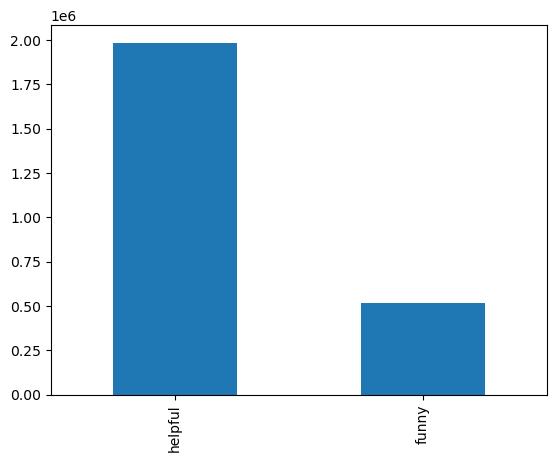

In [30]:
reco_label_clean['label'].value_counts().plot(kind = 'bar') #More users found review helpful than funny

<Axes: >

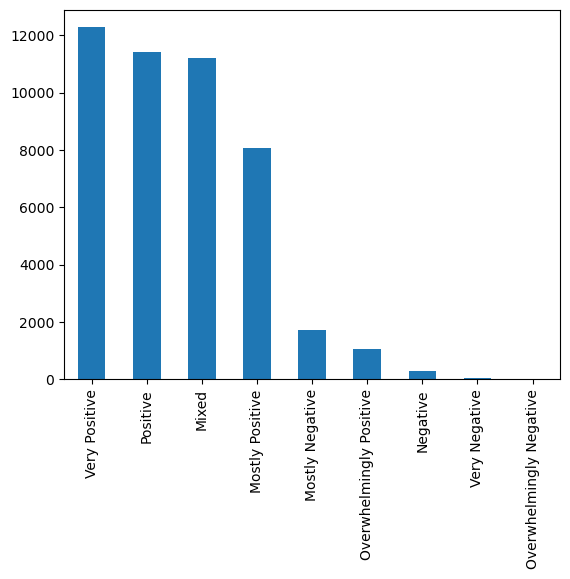

In [31]:
games['rating'].value_counts().plot(kind = 'bar') #most games very positive

In [32]:
reco_copy = reco.drop(columns = ['review_id'])

In [33]:
game_reco = pd.merge(reco_copy, games, on = 'app_id')

In [34]:
game_reco

,app_id,helpful,funny,date,is_recommended,hours,user_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,975370,0,0,2022-12-12,True,36.3,19954,Dwarf Fortress,2022-12-06,True,False,False,Overwhelmingly Positive,95,17773,29.99,29.99,0.0,True
1,975370,0,0,2022-12-22,True,24.3,4993590,Dwarf Fortress,2022-12-06,True,False,False,Overwhelmingly Positive,95,17773,29.99,29.99,0.0,True
2,975370,3,0,2022-12-07,True,177.0,4452487,Dwarf Fortress,2022-12-06,True,False,False,Overwhelmingly Positive,95,17773,29.99,29.99,0.0,True
3,975370,5,0,2022-12-12,True,388.6,3602361,Dwarf Fortress,2022-12-06,True,False,False,Overwhelmingly Positive,95,17773,29.99,29.99,0.0,True
4,975370,0,0,2022-12-07,True,70.1,5279412,Dwarf Fortress,2022-12-06,True,False,False,Overwhelmingly Positive,95,17773,29.99,29.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10072265,1531430,0,0,2022-12-17,True,125.3,373561,Paragon: The Overprime,2022-12-05,True,False,False,Mixed,58,8062,0.00,0.00,0.0,True
10072266,1531430,0,4,2022-12-08,False,0.1,2165144,Paragon: The Overprime,2022-12-05,True,False,False,Mixed,58,8062,0.00,0.00,0.0,True
10072267,1531430,0,0,2022-12-14,True,24.2,4388597,Paragon: The Overprime,2022-12-05,True,False,False,Mixed,58,8062,0.00,0.00,0.0,True
10072268,1531430,2,0,2022-12-12,True,121.7,705328,Paragon: The Overprime,2022-12-05,True,False,False,Mixed,58,8062,0.00,0.00,0.0,True


In [37]:
# More EDA: pie plot for windows,mac, linux, user reviews (top 10), correlation between price and rating?

In [38]:
# top 10 most reviewed games

games_top = games[['title', 'user_reviews']]

In [39]:
games_top_10 = games_top.sort_values(by = 'user_reviews', ascending = False).head(10) #top 10 reviewed games

In [40]:
games_top_10

,title,user_reviews
19041,Counter-Strike: Global Offensive,6941137
19489,PUBG: BATTLEGROUNDS,2142372
8746,Dota 2,1930493
5347,Grand Theft Auto V,1367837
19473,Tom Clancy's Rainbow Six® Siege,939992
9811,Team Fortress 2,935635
7342,Terraria,867226
2335,Garry's Mod,795170
3764,Rust,722973
7155,The Witcher® 3: Wild Hunt,640996


In [41]:
y = games_top_10['title']
x = games_top_10['user_reviews']

In [42]:
x

19041    6941137
19489    2142372
8746     1930493
5347     1367837
19473     939992
9811      935635
7342      867226
2335      795170
3764      722973
7155      640996
Name: user_reviews, dtype: int64

In [43]:
y

19041    Counter-Strike: Global Offensive
19489                 PUBG: BATTLEGROUNDS
8746                               Dota 2
5347                   Grand Theft Auto V
19473     Tom Clancy's Rainbow Six® Siege
9811                      Team Fortress 2
7342                             Terraria
2335                          Garry's Mod
3764                                 Rust
7155            The Witcher® 3: Wild Hunt
Name: title, dtype: object

Text(0.5, 0, 'Reviews')

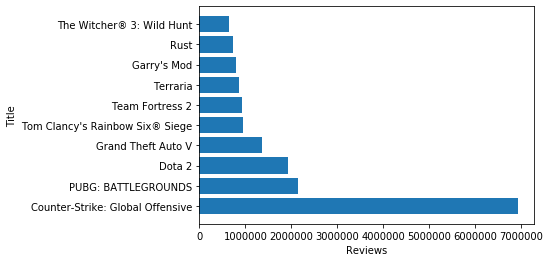

In [44]:
# chart of above, horizontal bar chart, how to sort values
plt.barh(y, x)
plt.ylabel('Title')
plt.xlabel('Reviews')

Text(0.5, 1.0, 'Top 10 User Reviewed Games')

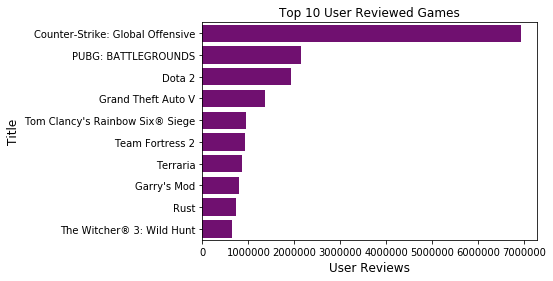

In [45]:
sns.barplot(x = 'user_reviews',
           y = 'title',
           data = games_top_10,
           color = 'purple')
plt.ylabel('Title', fontsize = 12)
plt.xlabel('User Reviews', fontsize = 12)
plt.title('Top 10 User Reviewed Games', fontsize = 12)

In [46]:
games_system = games[['win', 'mac', 'linux']]

In [47]:
games_system

,win,mac,linux
0,True,False,False
1,True,False,False
2,True,False,False
3,True,True,True
4,True,False,False
...,...,...,...
46063,True,False,False
46064,True,False,False
46065,True,False,False
46066,True,False,False


In [48]:
games_windows = games[['win']]
games_mac = games[['mac']]
games_linux = games[['linux']]

games_windows['type'] ='win'
games_mac['type'] = 'mac'
games_linux['type'] = 'linux'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [49]:
games_windows = games_windows.rename(columns = {'win': 'label'})

In [50]:
games_mac = games_mac.rename(columns = {'mac': 'label'})

In [51]:
games_linux = games_linux.rename(columns = {'linux': 'label'})

In [52]:
games_system = pd.concat([games_windows, games_mac, games_linux])

In [53]:
games_system

,label,type
0,True,win
1,True,win
2,True,win
3,True,win
4,True,win
...,...,...
46063,False,linux
46064,False,linux
46065,False,linux
46066,False,linux


In [54]:
pd.DataFrame(games_system.groupby(['type', 'label'])['label'].count()) #shows how many games are applicable to the OS

label
type  label       
linux False  37626
      True    8442
mac   False  33897
      True   12171
win   False    689
      True   45379

In [61]:
games_system['label'].value_counts()

False    72212
True     65992
Name: label, dtype: int64

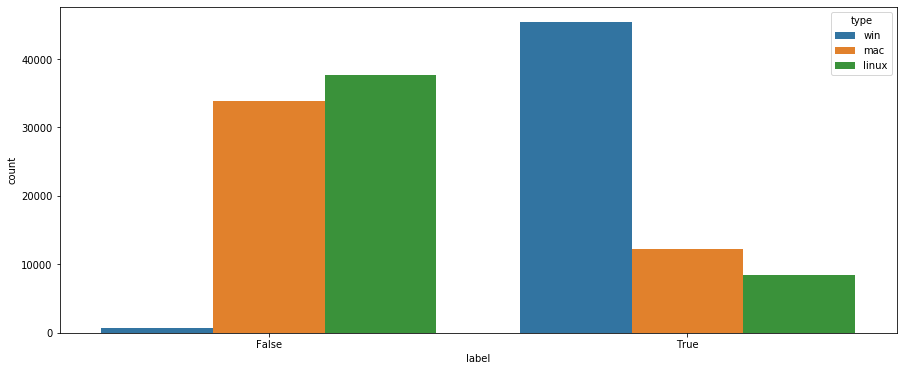

In [66]:
#Show how many games are for windows, linux, mac visually

plt.figure(figsize=(15, 6))
sns.countplot(data=games_system, x='label', hue='type')
plt.show()

In [78]:
games_group = pd.DataFrame(games_system.groupby(['type', 'label'])['label'].count())

In [81]:
games_group[['label']]

label
type  label       
linux False  37626
      True    8442
mac   False  33897
      True   12171
win   False    689
      True   45379

In [83]:
game_reco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10072270 entries, 0 to 10072269
Data columns (total 18 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int64  
 1   helpful         int64  
 2   funny           int64  
 3   date            object 
 4   is_recommended  bool   
 5   hours           float64
 6   title           object 
 7   date_release    object 
 8   win             bool   
 9   mac             bool   
 10  linux           bool   
 11  rating          object 
 12  positive_ratio  int64  
 13  user_reviews    int64  
 14  price_final     float64
 15  price_original  float64
 16  discount        float64
 17  steam_deck      bool   
dtypes: bool(5), float64(4), int64(5), object(4)
memory usage: 1.1+ GB


In [88]:
games_num = game_reco.select_dtypes(['int64', 'float64']).columns

In [91]:
games_num

Index(['app_id', 'helpful', 'funny', 'hours', 'positive_ratio', 'user_reviews',
       'price_final', 'price_original', 'discount'],
      dtype='object')

In [89]:
games_num_df = game_reco[games_num]

In [90]:
games_num_df

,app_id,helpful,funny,hours,positive_ratio,user_reviews,price_final,price_original,discount
0,975370,0,0,36.3,95,17773,29.99,29.99,0.0
1,975370,0,0,24.3,95,17773,29.99,29.99,0.0
2,975370,3,0,177.0,95,17773,29.99,29.99,0.0
3,975370,5,0,388.6,95,17773,29.99,29.99,0.0
4,975370,0,0,70.1,95,17773,29.99,29.99,0.0
...,...,...,...,...,...,...,...,...,...
10072265,1531430,0,0,125.3,58,8062,0.00,0.00,0.0
10072266,1531430,0,4,0.1,58,8062,0.00,0.00,0.0
10072267,1531430,0,0,24.2,58,8062,0.00,0.00,0.0
10072268,1531430,2,0,121.7,58,8062,0.00,0.00,0.0


In [92]:
games_num_corr = games_num_df.corr()
games_num_corr

,app_id,helpful,funny,hours,positive_ratio,user_reviews,price_final,price_original,discount
app_id,1.000000,-0.005915,-0.009069,-0.219102,-0.217269,-0.221279,0.242926,0.269051,0.018792
helpful,-0.005915,1.000000,0.443083,0.007067,-0.011299,0.007746,0.002930,0.001706,-0.001020
funny,-0.009069,0.443083,1.000000,0.005606,0.000964,0.007232,-0.002950,-0.004097,-0.000574
hours,-0.219102,0.007067,0.005606,1.000000,-0.053763,0.233694,-0.095426,-0.114743,-0.044639
positive_ratio,-0.217269,-0.011299,0.000964,-0.053763,1.000000,-0.030562,-0.062084,-0.112623,-0.045324
user_reviews,-0.221279,0.007746,0.007232,0.233694,-0.030562,1.000000,-0.133906,-0.240432,-0.057130
price_final,0.242926,0.002930,-0.002950,-0.095426,-0.062084,-0.133906,1.000000,0.902354,-0.187460
price_original,0.269051,0.001706,-0.004097,-0.114743,-0.112623,-0.240432,0.902354,1.000000,0.203894
discount,0.018792,-0.001020,-0.000574,-0.044639,-0.045324,-0.057130,-0.187460,0.203894,1.000000


In [96]:
game_reco['discount_pct'] = ((game_reco['price_final'] - game_reco['price_original']) / game_reco['price_original']) * 100 

In [101]:
game_reco['discount_pct'].sort_values().unique()

array([-90.0180036 , -90.0150025 , -85.01416903, -85.01062633,
       -85.00772798, -85.00736997, -84.01400233, -80.02667556,
       -80.020005  , -80.0160032 , -75.08342603, -75.06255213,
       -75.05003336, -75.03751876, -75.01875469, -70.01166861,
       -67.04469646, -67.02234078, -66.04402935, -65.06506507,
       -65.03251626, -60.0500417 , -60.03001501, -60.0240096 ,
       -60.02000667, -60.01714776, -60.01500375, -55.02751376,
       -55.00916819, -50.02501251, -50.01667222, -50.01250313,
       -50.010002  , -50.00833472, -44.02201101, -40.01333778,
       -40.0100025 , -40.0080016 , -40.00666778, -35.00500071,
       -33.01650825, -33.00550092, -30.0150075 , -30.00750188,
       -25.01250625, -24.01601067, -20.04008016, -20.0286123 ,
       -20.01334223, -20.010005  , -20.00666889, -20.00571592,
       -10.00714796, -10.0040016 ,   0.        ,          inf,
                nan])

In [106]:
game_reco[['price_final', 'price_original']].sort_values(by = 'price_final')

,price_final,price_original
10072269,0.00,0.00
6040931,0.00,0.00
6040930,0.00,0.00
6040929,0.00,0.00
6040928,0.00,0.00
...,...,...
5694673,69.99,69.99
5694674,69.99,69.99
5694675,69.99,69.99
5694667,69.99,69.99
